In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import sys # for deeper recursion
sys.setrecursionlimit(150000)
from collections import Counter
from itertools import filterfalse

business = pd.read_csv("business.csv" , encoding = 'latin1')

In [2]:
# focus on ON states
is_Toronto = (business["city"] == "Toronto")
inspection_Toronto = business[is_Toronto]
list_df_Toronto_categories = business[is_Toronto]["categories"].tolist()

In [3]:
# convert list of list-like string to actual list: output_str_list
output_str_list = []
str_list = []
for str_list_df_Toronto_categories in list_df_Toronto_categories[0:]:
    str_list.append(str_list_df_Toronto_categories)
for str_str_list in str_list:
    # we should avoid iterate nan item (data type of nan is float)
    if type(str_str_list) != float:
        x = "".join(str_str_list)
        x.replace(" ","")
        x.split(',')
        list_x = ast.literal_eval(x)
        str_str_list = list(str_str_list)
        str_str_list = list_x
        output_str_list.append(str_str_list)
    else:
        str_str_list = [str(str_str_list)]
        output_str_list.append(str_str_list)

In [4]:
list_cusines = ['Afghan', 'African', 'Senegalese', 'South African', 'American', 'American', 'Arabian', 'Argentine', 'Armenian',
 'Asian Fusion', 'Australian', 'Austrian', 'Bangladeshi', 'Barbeque', 'Basque', 'Belgian', 'Brasseries', 'Brazilian', 
 'British', 'Buffets', 'Burgers', 'Burmese' , 'Themed Cafes', 'Cafeteria', 'Cajun/Creole', 'Cambodian', 'Caribbean', 'Dominican',
 'Haitian', 'Puerto Rican', 'Trinidadian', 'Catalan', 'Cheesesteaks', 'Chicken Shop', 'Chicken Wings', 'Chinese', 'Cantonese', 'Dim Sum',
 'Hainan', 'Shanghainese', 'Szechuan', 'Comfort Food', 'Creperies', 'Cuban', 'Czech', 'Delis', 'Diners', 'Dinner Theater', 'Ethiopian',
 'Filipino', 'Fish & Chips', 'Fondue', 'Food Court', 'Food Stands', 'French', 'Mauritius', 'Reunion', 'Game Meat', 'Gastropubs',
 'German', 'Gluten-Free', 'Greek', 'Guamanian', 'Halal', 'Hawaiian', 'Himalayan/Nepalese', 'Honduran', 'Hong Kong Style Cafe',
 'Hot Dogs', 'Hot Pot', 'Hungarian', 'Iberian', 'Indian', 'Indonesian', 'Irish', 'Italian', 'Calabrian', 'Sardinian', 'Sicilian',
 'Tuscan', 'Japanese', 'Conveyor Belt Sushi', 'Izakaya', 'Japanese Curry', 'Ramen', 'Teppanyaki', 'Kebab', 'Korean', 'Kosher',
 'Laotian', 'Latin American', 'Colombian', 'Salvadoran', 'Venezuelan', 'Live/Raw Food', 'Malaysian', 'Mediterranean', 'Falafel',
 'Mexican', 'Tacos', 'Middle Eastern', 'Egyptian', 'Lebanese', 'Modern European', 'Mongolian', 'Moroccan', 'New Mexican Cuisine',
 'Nicaraguan', 'Noodles', 'Pakistani', 'Pan Asian', 'Persian/Iranian', 'Peruvian', 'Pizza', 'Polish', 'Pop-Up Restaurants', 'Portuguese',
 'Poutineries', 'Russian', 'Salad', 'Sandwiches', 'Scandinavian', 'Scottish', 'Seafood', 'Singaporean', 'Slovakian', 'Soul Food',
 'Soup', 'Southern', 'Spanish', 'Sri Lankan', 'Steakhouses', 'Supper Clubs', 'Sushi Bars', 'Syrian', 'Taiwanese', 'Tapas Bars',
 'Tapas/Small Plates', 'Tex-Mex', 'Thai', 'Turkish', 'Ukrainian', 'Uzbek', 'Vegan', 'Vegetarian', 'Vietnamese', 'Waffles', 
 'Wraps']


In [5]:
# if food, restaurant then keep, else replace by non-restaurant 

# assign a new list to store output_str_list to leave output_str_list unchanged
to_count_list = output_str_list

"""
have nested_list in to_count_list remain only one elements meet list_nationality_adj and
food_list
"""

to_count_list = [[cgt_element for cgt_element in nested_cgt if 
                  cgt_element in list_cusines] 
                for nested_cgt in to_count_list]




# assign string "non restaurant" to blank nested list in to_count_list
for nested_cgt in to_count_list:
    if nested_cgt == []:
        nested_cgt.append("non restaurant")




hashable_list = []
for items in to_count_list:
    if items[0] == 'Sushi Bars':
        items[0] = 'Japanese'
    AmericanFood = ['Sandwiches' , 'Pizza' , 'Burgers']
    if items[0] in AmericanFood:
        items[0] = 'American (Traditional)'
    
    hashable_list.append(items[0])
 

inspection_Toronto["reset_Category"] =  hashable_list

/Users/JasonChang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Axes(0.125,0.125;0.775x0.755)


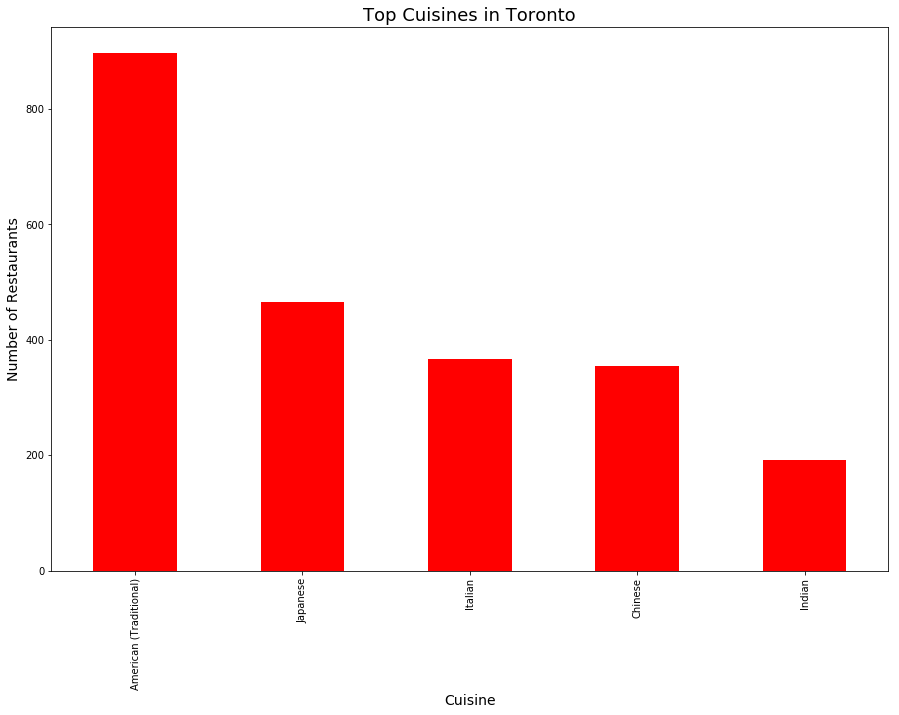

In [6]:
# since many categories are "non restarant", we have to exclude it.
is_restaurant = (inspection_Toronto["reset_Category"] !="non restaurant")
food_category = inspection_Toronto["reset_Category"][is_restaurant]

# top 5 cusines in Toronto.
print(food_category.value_counts()[:5].plot(kind = 'bar', figsize=(15,10), color = 'red'))
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Top Cuisines in Toronto', fontsize=18)
plt.show()

Axes(0.125,0.125;0.775x0.755)


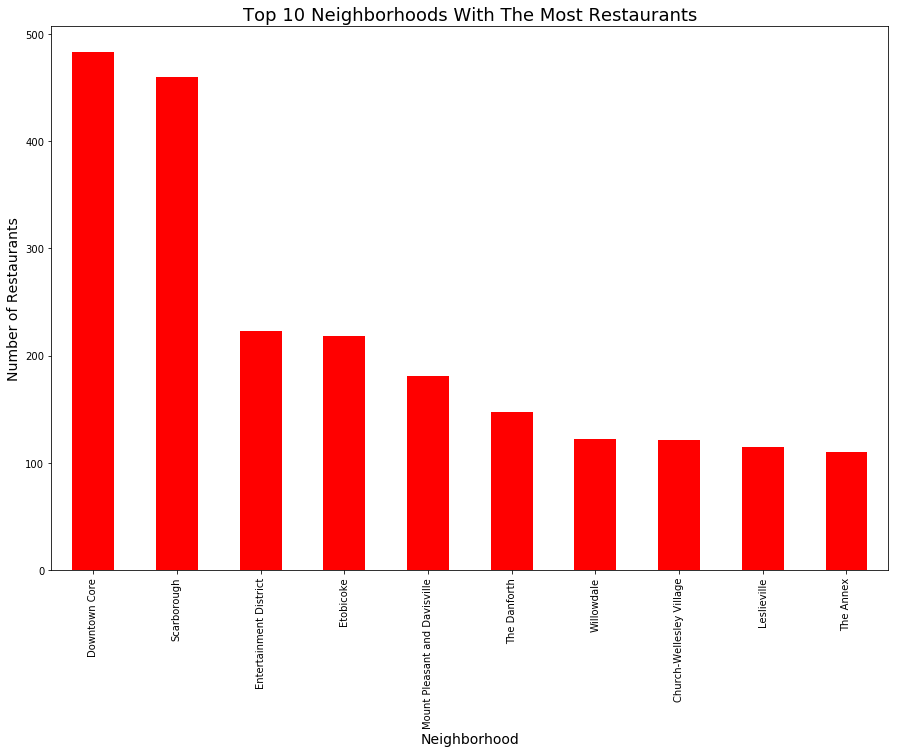

In [7]:
# top 10 neighborhoods where the most restaurants locate 
print(inspection_Toronto["neighborhood"][is_restaurant].value_counts()[:10].plot(kind = 'bar', figsize=(15,10), color = 'red'))
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Top 10 Neighborhoods With The Most Restaurants', fontsize=18)
plt.show()

In [8]:
#inspection_Toronto
restaurant_in_t = inspection_Toronto[is_restaurant]
is_American_traditional = (restaurant_in_t["reset_Category"] == "American (Traditional)")
is_Japanese = (restaurant_in_t["reset_Category"] == "Japanese")
is_Italian = (restaurant_in_t["reset_Category"] == "Italian")
is_Chinese = (restaurant_in_t["reset_Category"] == "Chinese")
is_Indian = (restaurant_in_t["reset_Category"] == "Indian")

In [9]:
restaurant_in_t

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,type,reset_Category
2,EDqCEAGXVGCH4FJXgqtjqg,Pizza Pizza,Dufferin Grove,979 Bloor Street W,Toronto,ON,M6H 1L5,43.661054,-79.429089,2.5,7,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Restaurants', 'Pizza', 'Chicken Wings', 'Ita...","['Monday 11:0-2:0', 'Tuesday 11:0-2:0', 'Wedne...",business,American (Traditional)
25,826djy6K_9Fp0ptqJ2_Yag,Chipotle Mexican Grill,Downtown Core,"123 Front St, Unit 103 and 103-A",Toronto,ON,M5J 2M2,43.644920,-79.383333,3.5,68,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Fast Food', 'Mexican', 'Restaurants']","['Monday 10:45-22:0', 'Tuesday 10:45-22:0', 'W...",business,Mexican
41,OLG7Gou8kmTLxogtJyP6ZQ,Z-Teca,The Beach,2014 Queen Street E,Toronto,ON,M4L 1J3,43.670327,-79.299190,1.5,4,0,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Tex-Mex', 'Restaurants']","['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",business,Tex-Mex
48,L_thK7r3K_h5M4tV7amEKQ,Honey B Hives Restaurant,Scarborough,2816 Markham Road,Toronto,ON,M1V 4C3,43.822982,-79.247915,3.5,118,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Diners', 'Italian', 'Sandwiches', 'Breakfast...","['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",business,Diners
59,6pSUvtk5-OOaJfX0hbkb8Q,Ichiban Sushi,Harbourfront,250 Queens Quay W,Toronto,ON,M5J,43.639601,-79.382890,3.5,9,0,"['Alcohol: beer_and_wine', 'BusinessAcceptsCre...","['Restaurants', 'Japanese', 'Sushi Bars']",NaN,business,Japanese
104,mRv3Z25F56qduMKnvnCkVA,Kokoya,Willowdale,5515 Yonge St,Toronto,ON,M2N 5S3,43.778223,-79.414869,3.0,41,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Korean', 'Restaurants']","['Monday 17:0-2:0', 'Tuesday 17:0-2:0', 'Wedne...",business,Korean
109,ODwqVEORhb9YAgo3MP0PXw,Yummy Bar-B-Q,NaN,561 Bloor Street W,Toronto,ON,M5S 1Y6,43.665106,-79.410744,3.5,5,0,"['Alcohol: beer_and_wine', 'BusinessAcceptsCre...","['Restaurants', 'Korean']",NaN,business,Korean
120,IikkB8j2E-1QmujRsPh5wQ,Kayagum,Willowdale,5460 Yonge Street,Toronto,ON,M2N 6K7,43.777384,-79.415295,3.0,73,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Korean', 'Restaurants']","['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",business,Korean
219,2KkTzafNqkEKr5VTjsR3hw,New Spiceland Restaurant,Scarborough,6065 Steeles Ave E,Toronto,ON,M1X 0B1,43.836590,-79.248699,2.5,3,1,"[""BusinessParking: {'garage': False, 'street':...","['Indian', 'Restaurants']",NaN,business,Indian
231,X1H-ZaSAXsX1DmHK16Jxwg,Brooklynn,West Queen West,1186 Queen Street W,Toronto,ON,M6J 1J6,43.642772,-79.426051,3.5,17,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Music Venues', 'Dance Clubs', 'Nightlife', '...","['Tuesday 21:0-2:0', 'Thursday 21:0-2:0', 'Fri...",business,American (Traditional)


In [10]:
American_traditional_restaurant_in_t = restaurant_in_t[is_American_traditional]
Japanese_restaurant_in_t = restaurant_in_t[is_Japanese]
Italian_restaurant_in_t = restaurant_in_t[is_Italian]
Chinese_restaurant_in_t = restaurant_in_t[is_Chinese]
Indian_restaurant_in_t = restaurant_in_t[is_Indian]

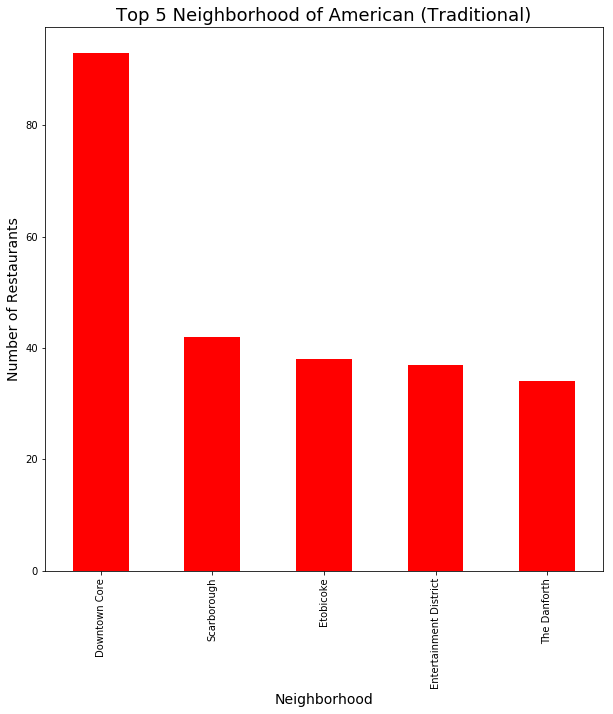

In [11]:
American_traditional_restaurant_in_t["neighborhood"].value_counts()[:5].plot(kind = 'bar', figsize=(10,10), color = 'red')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title("Top 5 Neighborhood of American (Traditional)", fontsize=18)
plt.show()

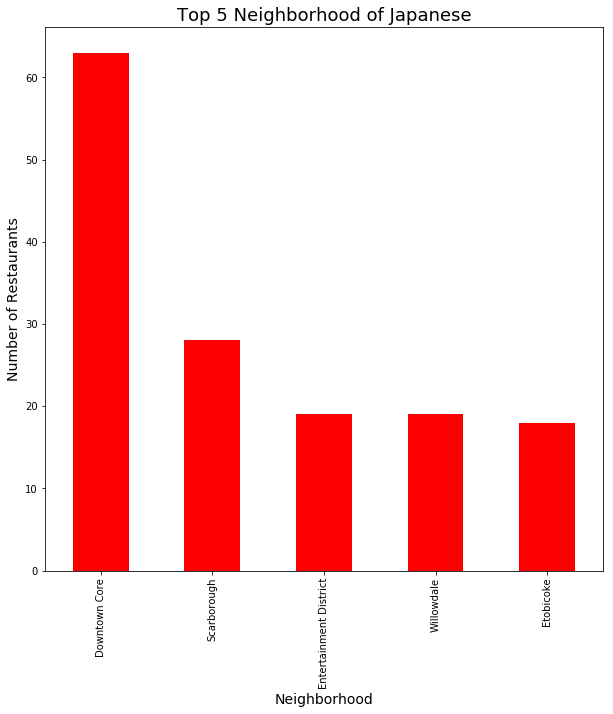

In [12]:
Japanese_restaurant_in_t["neighborhood"].value_counts()[:5].plot(kind = 'bar', figsize=(10,10), color = 'red')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title("Top 5 Neighborhood of Japanese", fontsize=18)
plt.show()

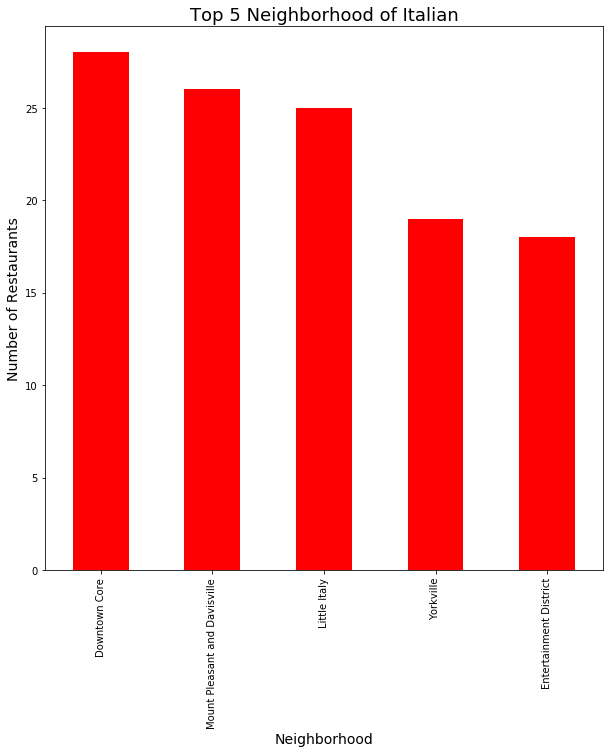

In [13]:
Italian_restaurant_in_t["neighborhood"].value_counts()[:5].plot(kind = 'bar', figsize=(10,10), color = 'red')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title("Top 5 Neighborhood of Italian", fontsize=18)
plt.show()

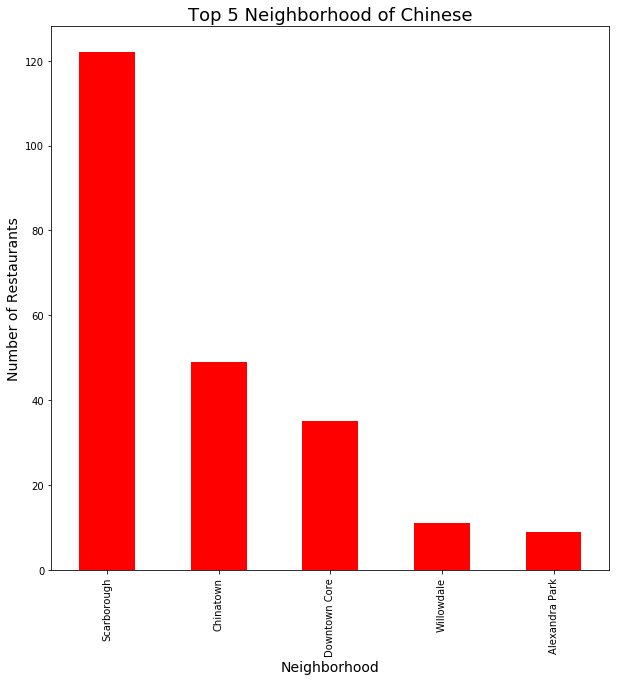

In [14]:
Chinese_restaurant_in_t["neighborhood"].value_counts()[:5].plot(kind = 'bar', figsize=(10,10), color = 'red')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title("Top 5 Neighborhood of Chinese", fontsize=18)
plt.show()

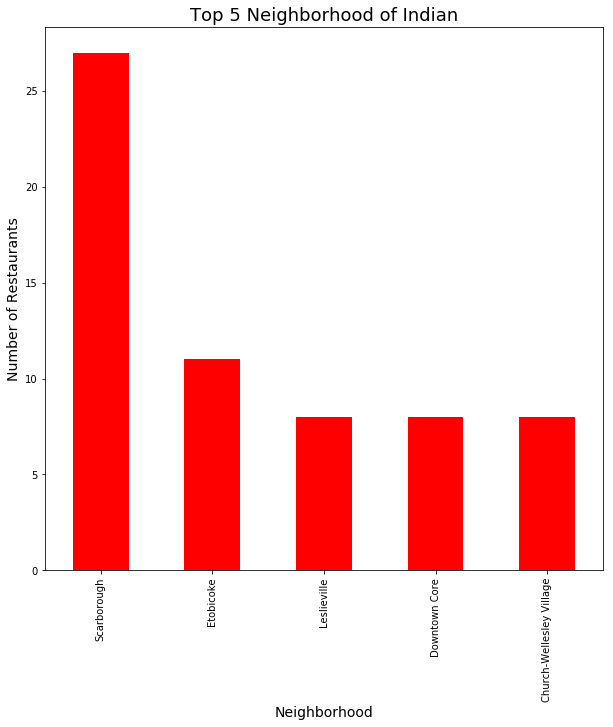

In [15]:
Indian_restaurant_in_t["neighborhood"].value_counts()[:5].plot(kind = 'bar', figsize=(10,10), color = 'red')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title("Top 5 Neighborhood of Indian", fontsize=18)
plt.show()

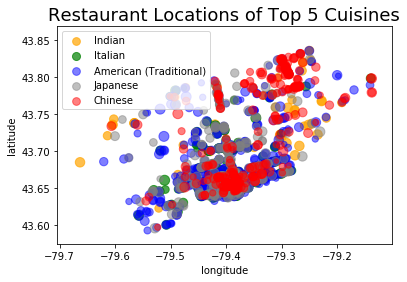

In [16]:
#Italian_restaurant_in_t.plot(kind='scatter', x = 'longitude', y = 'latitude')
chinese_restaurant = (restaurant_in_t["reset_Category"] == 'Chinese')
italian_restaurant = (restaurant_in_t["reset_Category"] == 'Italian')
american_restaurant = (restaurant_in_t["reset_Category"] == 'American (Traditional)')
japanese_restaurant = (restaurant_in_t["reset_Category"] == 'Japanese')
indian_restaurant = (restaurant_in_t["reset_Category"] == 'Indian')

first = restaurant_in_t[indian_restaurant].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='Orange', 
                   alpha = 0.7, 
                   label='Indian',
                   s=100*(restaurant_in_t[indian_restaurant]['stars']/5))

second = restaurant_in_t[italian_restaurant].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='Green', 
                   alpha = 0.7, 
                   label='Italian',
                   s=100*(restaurant_in_t[italian_restaurant]['stars']/5),
                   ax = first)

third = restaurant_in_t[american_restaurant].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='Blue', 
                   alpha = 0.5, 
                   label='American (Traditional)',
                   s=100*(restaurant_in_t[american_restaurant]['stars']/5),
                   ax = second)

fourth = restaurant_in_t[japanese_restaurant].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='grey', 
                   alpha = 0.5, 
                   label='Japanese',
                   s=100*(restaurant_in_t[japanese_restaurant]['stars']/5),
                   ax = third)

first = restaurant_in_t[chinese_restaurant].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='Red', 
                   alpha = 0.5,  
                   label='Chinese',
                   s=100*(restaurant_in_t[chinese_restaurant]['stars']/5),
                   ax = fourth)

plt.rcParams['figure.figsize'] = (30, 20)
plt.title("Restaurant Locations of Top 5 Cuisines", fontsize=18)
plt.show()

In [17]:
def cusine_concentration_in_neighborhood(neighborhood , cusine):
    is_in_neighborhood = (restaurant_in_t["neighborhood"] == neighborhood)
    neighborhood_restaurant = restaurant_in_t[is_in_neighborhood]
    is_Cusine_neighborhood_restaurant = (neighborhood_restaurant["reset_Category"] == cusine)
    cusine_neighborhood_restaurant = neighborhood_restaurant[is_Cusine_neighborhood_restaurant]
    concentration_cusine_scarborough = (len(cusine_neighborhood_restaurant)/len(neighborhood_restaurant))
    return concentration_cusine_scarborough

concentration_1_american_neighborhod = cusine_concentration_in_neighborhood("Downtown Core" , "American (Traditional)")
concentration_2_american_neighborhod = cusine_concentration_in_neighborhood("Scarborough" ,"American (Traditional)")
concentration_3_american_neighborhod = cusine_concentration_in_neighborhood("Etobicoke" ,"American (Traditional)")
concentration_4_american_neighborhod = cusine_concentration_in_neighborhood("Entertainment District" ,"American (Traditional)")
concentration_5_american_neighborhod = cusine_concentration_in_neighborhood("The Danforth" ,"American (Traditional)")

concentration_american_neighborhod = [concentration_1_american_neighborhod,concentration_2_american_neighborhod,
                                     concentration_3_american_neighborhod,concentration_4_american_neighborhod,
                                     concentration_5_american_neighborhod]

concentration_1_chinese_neighborhod = cusine_concentration_in_neighborhood("Scarborough" , "Chinese")
concentration_2_chinese_neighborhod = cusine_concentration_in_neighborhood("Chinatown" ,"Chinese")
concentration_3_chinese_neighborhod = cusine_concentration_in_neighborhood("Downtown Core" ,"Chinese")
concentration_4_chinese_neighborhod = cusine_concentration_in_neighborhood("Willowdale" ,"Chinese")
concentration_5_chinese_neighborhod = cusine_concentration_in_neighborhood("Alexandra Park" ,"Chinese")

concentration_chinese_neighborhod = [concentration_1_chinese_neighborhod,concentration_2_chinese_neighborhod,
                                    concentration_3_chinese_neighborhod,concentration_4_chinese_neighborhod,
                                    concentration_5_chinese_neighborhod]

concentration_1_japanese_neighborhod = cusine_concentration_in_neighborhood("Downtown Core" , "Japanese")
concentration_2_japanese_neighborhod = cusine_concentration_in_neighborhood("Scarborough" ,"Japanese")
concentration_3_japanese_neighborhod = cusine_concentration_in_neighborhood("Willowdale" ,"Japanese")
concentration_4_japanese_neighborhod = cusine_concentration_in_neighborhood("Entertainment District" ,"Japanese")
concentration_5_japanese_neighborhod = cusine_concentration_in_neighborhood("Etobicoke" ,"Japanese")

concentration_japanese_neighborhod = [concentration_1_japanese_neighborhod,concentration_2_japanese_neighborhod,
                                     concentration_3_japanese_neighborhod,concentration_4_japanese_neighborhod,
                                     concentration_5_japanese_neighborhod]

concentration_1_italian_neighborhod = cusine_concentration_in_neighborhood("Downtown Core" , "Italian")
concentration_2_italian_neighborhod = cusine_concentration_in_neighborhood("Mount Pleasant and Davisville" ,"Italian")
concentration_3_italian_neighborhod = cusine_concentration_in_neighborhood("Little Italy" ,"Italian")
concentration_4_italian_neighborhod = cusine_concentration_in_neighborhood("Yorkville" ,"Italian")
concentration_5_italian_neighborhod = cusine_concentration_in_neighborhood("Entertainment District" ,"Italian")

concentration_italian_neighborhod = [concentration_1_italian_neighborhod,concentration_2_italian_neighborhod,
                                     concentration_3_italian_neighborhod,concentration_4_italian_neighborhod,
                                     concentration_5_italian_neighborhod]

concentration_1_indian_neighborhod = cusine_concentration_in_neighborhood("Scarborough" , "Indian")
concentration_2_indian_neighborhod = cusine_concentration_in_neighborhood("Etobicoke" ,"Indian")
concentration_3_indian_neighborhod = cusine_concentration_in_neighborhood("Church-Wellesley Village" ,"Indian")
concentration_4_indian_neighborhod = cusine_concentration_in_neighborhood("Downtown Core" ,"Indian")
concentration_5_indian_neighborhod = cusine_concentration_in_neighborhood("Leslieville" ,"Indian")

concentration_indian_neighborhod = [concentration_1_indian_neighborhod,concentration_2_indian_neighborhod,
                                     concentration_3_indian_neighborhod,concentration_4_indian_neighborhod,
                                     concentration_5_indian_neighborhod]

In [18]:
def avg_stars_cusine_neighborhood(neighborhood , cusine):
    is_in_neighborhood = (restaurant_in_t["neighborhood"] == neighborhood)
    neighborhood_restaurant = restaurant_in_t[is_in_neighborhood]
    is_cusine_neighborhood_restaurant = (neighborhood_restaurant["reset_Category"] == cusine)
    cusine_neighborhood_restaurant = neighborhood_restaurant[is_cusine_neighborhood_restaurant]
    mean_star = cusine_neighborhood_restaurant["stars"].mean()
    return mean_star

avgStar1_american_neighborhod = avg_stars_cusine_neighborhood("Downtown Core", "American (Traditional)")
avgStar2_american_neighborhod = avg_stars_cusine_neighborhood("Scarborough", "American (Traditional)")
avgStar3_american_neighborhod = avg_stars_cusine_neighborhood("Etobicoke", "American (Traditional)")
avgStar4_american_neighborhod = avg_stars_cusine_neighborhood("Entertainment District", "American (Traditional)")
avgStar5_american_neighborhod = avg_stars_cusine_neighborhood("The Danforth", "American (Traditional)")

list_avgStar_american_neighborhood = [avgStar1_american_neighborhod,avgStar2_american_neighborhod,avgStar3_american_neighborhod,
                                      avgStar4_american_neighborhod,avgStar5_american_neighborhod]

avgStar1_chinese_neighborhod = avg_stars_cusine_neighborhood("Scarborough", "Chinese")
avgStar2_chinese_neighborhod = avg_stars_cusine_neighborhood("Chinatown", "Chinese")
avgStar3_chinese_neighborhod = avg_stars_cusine_neighborhood("Downtown Core", "Chinese")
avgStar4_chinese_neighborhod = avg_stars_cusine_neighborhood("Willowdale", "Chinese")
avgStar5_chinese_neighborhod = avg_stars_cusine_neighborhood("Alexandra Park", "Chinese")

list_avgStar_Chinese_neighborhood = [avgStar1_chinese_neighborhod,avgStar2_chinese_neighborhod,avgStar3_chinese_neighborhod,
                                      avgStar4_chinese_neighborhod,avgStar5_chinese_neighborhod]

avgStar1_japanese_neighborhod = avg_stars_cusine_neighborhood("Downtown Core", "Japanese")
avgStar2_japanese_neighborhod = avg_stars_cusine_neighborhood("Scarborough", "Japanese")
avgStar3_japanese_neighborhod = avg_stars_cusine_neighborhood("Willowdale", "Japanese")
avgStar4_japanese_neighborhod = avg_stars_cusine_neighborhood("Entertainment District", "Japanese")
avgStar5_japanese_neighborhod = avg_stars_cusine_neighborhood("Etobicoke", "Japanese")

list_avgStar_japanese_neighborhood = [avgStar1_japanese_neighborhod,avgStar2_japanese_neighborhod,avgStar3_japanese_neighborhod,
                                      avgStar4_japanese_neighborhod,avgStar5_japanese_neighborhod]

avgStar1_italian_neighborhod = avg_stars_cusine_neighborhood("Downtown Core", "Italian")
avgStar2_italian_neighborhod = avg_stars_cusine_neighborhood("Mount Pleasant and Davisville", "Italian")
avgStar3_italian_neighborhod = avg_stars_cusine_neighborhood("Little Italy", "Italian")
avgStar4_italian_neighborhod = avg_stars_cusine_neighborhood("Yorkville", "Italian")
avgStar5_italian_neighborhod = avg_stars_cusine_neighborhood("Entertainment District", "Italian")

list_avgStar_italian_neighborhood = [avgStar1_italian_neighborhod,avgStar2_italian_neighborhod,avgStar3_italian_neighborhod,
                                      avgStar4_italian_neighborhod,avgStar5_italian_neighborhod]

avgStar1_indian_neighborhod = avg_stars_cusine_neighborhood("Downtown Core", "Indian")
avgStar2_indian_neighborhod = avg_stars_cusine_neighborhood("Scarborough", "Indian")
avgStar3_indian_neighborhod = avg_stars_cusine_neighborhood("Etobicoke", "Indian")
avgStar4_indian_neighborhod = avg_stars_cusine_neighborhood("Entertainment District", "Indian")
avgStar5_indian_neighborhod = avg_stars_cusine_neighborhood("The Danforth", "Indian")

list_avgStar_indian_neighborhood = [avgStar1_indian_neighborhod,avgStar2_indian_neighborhod,avgStar3_indian_neighborhod,
                                      avgStar4_indian_neighborhod,avgStar5_indian_neighborhod]

In [19]:
italian_avg_stars = restaurant_in_t[italian_restaurant]["stars"].mean()
ix = [0.0, 0.5]
iy = [italian_avg_stars, italian_avg_stars]

japanese_avg_stars = restaurant_in_t[japanese_restaurant]["stars"].mean()
jx = [0.0, 0.5]
jy = [japanese_avg_stars, japanese_avg_stars]

Legend
Text(0.5,0,'Concentration of Cuisine')
Text(0,0.5,'Average Rating')


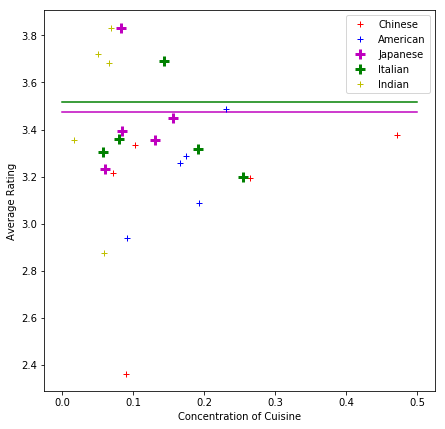

In [20]:
fig = plt.figure(figsize = (7,7)) 

print(plt.plot(ix,iy, 'g-'))
print(plt.plot(jx,jy, 'm-'))
print(plt.plot(concentration_chinese_neighborhod,list_avgStar_Chinese_neighborhood, 'r+', label='Chinese'))
print(plt.plot(concentration_american_neighborhod,list_avgStar_american_neighborhood, 'b+', label='American'))
print(plt.plot(concentration_japanese_neighborhod,list_avgStar_japanese_neighborhood, 'm+', mew=3, ms=10, label = 'Japanese'))
print(plt.plot(concentration_italian_neighborhod,list_avgStar_italian_neighborhood, 'g+', mew=3, ms=10, label='Italian'))
print(plt.plot(concentration_indian_neighborhod,list_avgStar_indian_neighborhood, 'y+', label='Indian'))
print(plt.legend(loc='upper right'))
print(plt.xlabel('Concentration of Cuisine', fontsize=10))
print(plt.ylabel('Average Rating', fontsize=10))
plt.show()

In [21]:
# input "checkin_sum.csv" to panda dataframe
checkin_sum = pd.read_csv("checkin_sum.csv" , encoding = 'utf-8')


# panda merge tutorial : http://pandas.pydata.org/pandas-docs/stable/merging.html
# join inspection_Toronto[is_restaurant] and checkin_sum where the "business_id" is same
join_frame = pd.merge(inspection_Toronto[is_restaurant] , checkin_sum , left_on = 'business_id' , right_on = 'business_id')


business_id           object
name                  object
neighborhood          object
address               object
city                  object
state                 object
postal_code           object
latitude             float64
longitude            float64
stars                float64
review_count           int64
is_open                int64
attributes            object
categories            object
hours                 object
type_x                object
reset_Category        object
time                  object
type_y                object
Checkin_Frequency      int64
dtype: object

In [22]:
join_frame

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,type_x,reset_Category,time,type_y,Checkin_Frequency
0,EDqCEAGXVGCH4FJXgqtjqg,Pizza Pizza,Dufferin Grove,979 Bloor Street W,Toronto,ON,M6H 1L5,43.661054,-79.429089,2.5,7,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Restaurants', 'Pizza', 'Chicken Wings', 'Ita...","['Monday 11:0-2:0', 'Tuesday 11:0-2:0', 'Wedne...",business,American (Traditional),"{'Fri_0': 1, 'Sat_1': 1, 'Thu_3': 2, 'Fri_5': ...",checkin,29
1,826djy6K_9Fp0ptqJ2_Yag,Chipotle Mexican Grill,Downtown Core,"123 Front St, Unit 103 and 103-A",Toronto,ON,M5J 2M2,43.644920,-79.383333,3.5,68,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Fast Food', 'Mexican', 'Restaurants']","['Monday 10:45-22:0', 'Tuesday 10:45-22:0', 'W...",business,Mexican,"{'Fri_0': 7, 'Mon_0': 1, 'Sat_0': 2, 'Sun_0': ...",checkin,302
2,OLG7Gou8kmTLxogtJyP6ZQ,Z-Teca,The Beach,2014 Queen Street E,Toronto,ON,M4L 1J3,43.670327,-79.299190,1.5,4,0,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Tex-Mex', 'Restaurants']","['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",business,Tex-Mex,"{'Wed_0': 1, 'Sat_17': 1, 'Sun_17': 1, 'Sat_20...",checkin,5
3,L_thK7r3K_h5M4tV7amEKQ,Honey B Hives Restaurant,Scarborough,2816 Markham Road,Toronto,ON,M1V 4C3,43.822982,-79.247915,3.5,118,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Diners', 'Italian', 'Sandwiches', 'Breakfast...","['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",business,Diners,"{'Mon_0': 6, 'Sat_0': 4, 'Sun_0': 5, 'Tue_0': ...",checkin,276
4,6pSUvtk5-OOaJfX0hbkb8Q,Ichiban Sushi,Harbourfront,250 Queens Quay W,Toronto,ON,M5J,43.639601,-79.382890,3.5,9,0,"['Alcohol: beer_and_wine', 'BusinessAcceptsCre...","['Restaurants', 'Japanese', 'Sushi Bars']",NaN,business,Japanese,"{'Sat_0': 3, 'Sun_1': 1, 'Mon_17': 1, 'Tue_20'...",checkin,11
5,mRv3Z25F56qduMKnvnCkVA,Kokoya,Willowdale,5515 Yonge St,Toronto,ON,M2N 5S3,43.778223,-79.414869,3.0,41,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Korean', 'Restaurants']","['Monday 17:0-2:0', 'Tuesday 17:0-2:0', 'Wedne...",business,Korean,"{'Mon_0': 4, 'Sat_0': 3, 'Sun_0': 4, 'Thu_0': ...",checkin,88
6,ODwqVEORhb9YAgo3MP0PXw,Yummy Bar-B-Q,NaN,561 Bloor Street W,Toronto,ON,M5S 1Y6,43.665106,-79.410744,3.5,5,0,"['Alcohol: beer_and_wine', 'BusinessAcceptsCre...","['Restaurants', 'Korean']",NaN,business,Korean,{'Thu_21': 1},checkin,1
7,IikkB8j2E-1QmujRsPh5wQ,Kayagum,Willowdale,5460 Yonge Street,Toronto,ON,M2N 6K7,43.777384,-79.415295,3.0,73,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Korean', 'Restaurants']","['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",business,Korean,"{'Fri_0': 2, 'Mon_0': 6, 'Sat_0': 3, 'Sun_0': ...",checkin,294
8,2KkTzafNqkEKr5VTjsR3hw,New Spiceland Restaurant,Scarborough,6065 Steeles Ave E,Toronto,ON,M1X 0B1,43.836590,-79.248699,2.5,3,1,"[""BusinessParking: {'garage': False, 'street':...","['Indian', 'Restaurants']",NaN,business,Indian,"{'Sun_1': 1, 'Wed_20': 1}",checkin,2
9,X1H-ZaSAXsX1DmHK16Jxwg,Brooklynn,West Queen West,1186 Queen Street W,Toronto,ON,M6J 1J6,43.642772,-79.426051,3.5,17,1,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Music Venues', 'Dance Clubs', 'Nightlife', '...","['Tuesday 21:0-2:0', 'Thursday 21:0-2:0', 'Fri...",business,American (Traditional),"{'Fri_0': 1, 'Fri_1': 2, 'Mon_2': 1, 'Sat_2': ...",checkin,35


In [23]:
join_frame.describe()

,latitude,longitude,stars,review_count,is_open,Checkin_Frequency
count,114090.000000,114090.000000,114090.000000,114090.000000,114090.000000,114090.000000
mean,43.692600,-79.401147,3.348979,52.317293,0.791314,131.796985
std,0.051443,0.066685,0.766083,96.525942,0.406371,534.643435
min,43.592484,-79.663413,1.000000,3.000000,0.000000,1.000000
25%,43.656894,-79.424990,3.000000,6.000000,1.000000,6.000000
50%,43.666819,-79.399271,3.500000,25.000000,1.000000,20.000000
75%,43.716793,-79.373408,4.000000,54.000000,1.000000,79.000000
max,43.876501,-79.137540,5.000000,1145.000000,1.000000,14757.000000


In [24]:
inspection_Toronto[is_restaurant]["stars"].describe()

count    5486.000000
mean        3.417700
std         0.730703
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

In [25]:
# create hidden gems table
is_star_4dot5_plus = (join_frame["stars"] >= 4.5)
# join_frame[is_star_4dot5_plus]

# review_count among 5 to 10
is_review_count_5_to_10 = ((join_frame[is_star_4dot5_plus]["review_count"] < 10) & (join_frame[is_star_4dot5_plus]["review_count"] > 5))
join_frame[is_star_4dot5_plus][is_review_count_5_to_10]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,type_x,reset_Category,time,type_y,Checkin_Frequency
108921,vBGfITg_FEkFYMQwNagbBA,Burrito Caliente Latin Grill,NaN,112E - 5555 Eglinton Avenue W,Toronto,ON,M9C 5M1,43.650649,-79.602846,5.0,9,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Tex-Mex', 'Mexican', 'Restaurants']",NaN,business,Tex-Mex,"{'Thu_15': 1, 'Tue_16': 1, 'Fri_17': 2, 'Mon_1...",checkin,6
108938,6a7zecn8W8r9dDWwQVb6aA,Novecento,Corso Italia,1228 Saint Clair Avenue W,Toronto,ON,M6E 1B7,43.677560,-79.445139,4.5,7,0,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Italian', 'Restaurants']",NaN,business,Italian,"{'Mon_0': 1, 'Sat_0': 1, 'Fri_4': 1, 'Wed_14':...",checkin,11
108939,KyO_DCkbUL1AJSxdgIihUw,Village Juicery,Roncesvalles,99 Roncesvalles Ave,Toronto,ON,M6R 2K9,43.642113,-79.447282,4.5,7,1,"['Alcohol: none', 'BikeParking: True', 'Busine...","['Organic Stores', 'Salad', 'Juice Bars & Smoo...","['Monday 7:30-20:0', 'Tuesday 7:30-20:0', 'Wed...",business,Salad,"{'Sat_15': 1, 'Thu_18': 1, 'Wed_21': 1, 'Sat_2...",checkin,4
108943,6D_rZE3vtdur2RR_QK0G6Q,Mr Right Pizza,Bickford Park,821A Bloor Street W,Toronto,ON,M6G 1M1,43.662588,-79.422365,4.5,9,0,"['Alcohol: none', 'BusinessAcceptsCreditCards:...","['Pizza', 'Chicken Wings', 'Restaurants']","['Monday 11:0-23:0', 'Tuesday 11:0-23:0', 'Wed...",business,American (Traditional),"{'Sat_0': 1, 'Sun_0': 2, 'Wed_18': 1, 'Fri_22'...",checkin,8
109026,ZTMvTe0yMh_3gH97Cr2jpQ,Aish Tanoor,NaN,994 Eglinton Avenue W,Toronto,ON,M6C 2C5,43.700322,-79.429517,5.0,6,1,NaN,"['Restaurants', 'Middle Eastern', 'Kosher']","['Monday 11:0-22:0', 'Tuesday 11:0-22:0', 'Wed...",business,Middle Eastern,{'Thu_19': 1},checkin,1
109108,u8NZ-A_3mfYwKXo9KB2EKQ,Triple Z Roti Shop,The Junction,2910 Dundas Street W,Toronto,ON,M6P 1Y8,43.665544,-79.466533,4.5,7,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Restaurants', 'Caribbean']",NaN,business,Caribbean,"{'Sat_18': 1, 'Tue_21': 1, 'Sat_23': 1}",checkin,3
109157,k-kYbovXIa8CenGs0Tr3Rw,Bonne Journee,Leslieville,1576 Queen Street E,Toronto,ON,M4L 1G1,43.666078,-79.318325,4.5,6,0,"[""BusinessParking: {'garage': False, 'street':...","['French', 'Food', 'Bakeries', 'Restaurants']","['Tuesday 9:0-19:0', 'Wednesday 9:0-19:0', 'Th...",business,French,"{'Fri_0': 1, 'Fri_1': 1, 'Mon_16': 1, 'Sun_17'...",checkin,9
109251,hQ66PZ605HFoaHW0dZAmYQ,Wafels & More,Kensington Market,237 Augusta Avenue,Toronto,ON,M5T 2L8,43.654606,-79.402058,5.0,9,1,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Waffles', 'Breakfast & Brunch', 'Food', 'Res...","['Monday 11:30-22:0', 'Tuesday 11:0-22:0', 'We...",business,Waffles,"{'Fri_0': 1, 'Sun_0': 1, 'Fri_1': 1, 'Sat_1': ...",checkin,46
109266,0gEPvzMBpVv6M75cdITSGg,Sushi CafÃ© Myoung Dong Soon To Fu Korea Resta...,Koreatown,620 Bloor Street West,Toronto,ON,M6G,43.664527,-79.414051,5.0,6,0,"['Alcohol: beer_and_wine', ""Ambience: {'romant...","['Korean', 'Restaurants']",NaN,business,Korean,"{'Thu_1': 1, 'Tue_1': 1, 'Sun_23': 1}",checkin,3
109319,RxYyUo3fHpmUfKuvxmGGxg,Kim's ? La Cart,Alexandra Park,"Scadding Court Community Centre, 707 Dundas St...",Toronto,ON,M5T 2W6,43.651425,-79.404123,4.5,8,1,NaN,"['Restaurants', 'Korean']","['Tuesday 11:0-19:0', 'Wednesday 11:0-19:0', '...",business,Korean,"{'Tue_15': 1, 'Wed_16': 1, 'Tue_17': 1, 'Wed_1...",checkin,5


In [ ]:
# checkin < 8
is_checkin_count_8_minus = ((join_frame[is_star_4dot5_plus]["Checkin_Frequency"] < 8))
join_frame[is_star_4dot5_plus][is_checkin_count_8_minus]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,type_x,reset_Category,time,type_y,Checkin_Frequency
20844,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,{'Sun_18': 1},checkin,1
20848,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,{'Fri_16': 1},checkin,1
20849,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,"{'Sun_3': 1, 'Tue_14': 1, 'Fri_19': 1}",checkin,3
20855,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,{'Sat_16': 1},checkin,1
20857,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,"{'Mon_15': 1, 'Sun_17': 1, 'Mon_18': 1, 'Wed_2...",checkin,5
20860,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,"{'Fri_17': 1, 'Thu_18': 1, 'Sat_20': 1, 'Wed_2...",checkin,5
20861,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,{'Wed_22': 1},checkin,1
20862,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,"{'Sat_15': 1, 'Wed_17': 1}",checkin,2
20868,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,"{'Sat_8': 1, 'Fri_17': 1, 'Sun_21': 1}",checkin,3
20873,#NAME?,Sora Ethiopian Restaurant,The Danforth,1383 Danforth Avenue,Toronto,ON,M4J 1M9,43.682280,-79.327995,4.5,3,1,"['BusinessAcceptsCreditCards: True', 'GoodForK...","['Ethiopian', 'Restaurants']","['Monday 11:0-1:0', 'Tuesday 11:0-1:0', 'Wedne...",business,Ethiopian,{'Thu_15': 1},checkin,1


In [ ]:
# CREATE CODE WHERE YOU CAN INPUT ZIPCODE AND IT LOOKS FOR HIGHLY-RATED RESTAURANTS WITH <x # OF REVIEWS (UNDER THE RADAR)

neighborhood = input("please input the neighborhood: ")
is_neighborhood_hidden_gem = (join_frame[is_star_4dot5_plus][is_review_count_5_to_10]["neighborhood"] == neighborhood)
join_frame[is_star_4dot5_plus][is_review_count_5_to_10][is_neighborhood_hidden_gem]

In [ ]:
pivot_count = restaurant_in_t[['neighborhood' , 'reset_Category']]
counting = pivot_count.pivot_table(index = 'neighborhood' , columns = 'reset_Category' , aggfunc=len, margins=True)
counting_top = counting.reindex(counting.sort_values(by = 'All' , ascending=False).index[:])
counting_top

In [ ]:
pivot_percentage = counting_top.div(counting_top.iloc[:,-1], axis=0)
pivot_percentage = pivot_percentage.T
pivot_percentage = pivot_percentage.sort_values(by = 'All',ascending = False)
pivot_percentage = pivot_percentage.T
pivot_percentage

In [ ]:
# output dataframe of % to excel .xlsx file
writer = pd.ExcelWriter('percentage_output.xlsx' , engine='xlsxwriter')
pivot_percentage.to_excel(writer,'Sheet1')
writer.save()